In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [65]:
df = pd.read_csv('pr13_final_selected.csv')

# EDA

In [66]:
df

,Dividends,Stock Splits,Ticker,Industry_Tag,Country,Close,Year,Month,Day,DayOfWeek,...,Weighted_Mean_50,Weighted_Std_50,Weighted_Mean_80,Weighted_Std_80,Weighted_Mean_100,Weighted_Std_100,return_since_last_entry,diff_since_last_entry,Dividends_signal,Stock Splits_signal
0,0.0,0.0,AAPL,technology,usa,0.848323,2000,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,0.0,0.0,AAPL,technology,usa,0.776801,2000,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,0.0,0.0,AAPL,technology,usa,0.788168,2000,1,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.084310,-0.071522,0,0
3,0.0,0.0,AAPL,technology,usa,0.754065,2000,1,7,4,...,NaN,NaN,NaN,NaN,NaN,NaN,0.014633,0.011367,0,0
4,0.0,0.0,AAPL,technology,usa,0.702910,2000,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.043269,-0.034103,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98911,0.0,0.0,ZM,technology,usa,67.570000,2023,8,240,0,...,67.893879,2.853087,68.613516,4.308918,69.996574,8.684420,0.028406,1.869995,0,0
98912,0.0,0.0,ZM,technology,usa,71.720001,2023,9,244,4,...,68.007660,2.836239,68.690208,3.909056,70.196486,8.794551,-0.001920,-0.129997,0,0
98913,0.0,0.0,ZM,technology,usa,72.059998,2023,9,251,4,...,68.782732,3.223557,69.500643,4.125710,71.246183,9.291970,0.061418,4.150002,0,0
98914,0.0,0.0,ZM,technology,usa,71.110001,2023,9,258,4,...,69.280983,3.336209,69.959714,4.126633,71.726531,9.222725,0.004741,0.339996,0,0


In [67]:
df.columns

Index(['Dividends', 'Stock Splits', 'Ticker', 'Industry_Tag', 'Country',
       'Close', 'Year', 'Month', 'Day', 'DayOfWeek', 'Day_Number',
       'Close_Lag_1', 'Volume_Lag_1', 'Days_Since_Lag_1', 'Close_Lag_2',
       'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5', 'Close_Lag_20',
       'Close_Lag_50', 'Close_Lag_80', 'Close_Lag_100', 'Weighted_Mean_2',
       'Weighted_Std_2', 'Weighted_Mean_3', 'Weighted_Std_3',
       'Weighted_Mean_4', 'Weighted_Std_4', 'Weighted_Mean_5',
       'Weighted_Std_5', 'Weighted_Mean_20', 'Weighted_Std_20',
       'Weighted_Mean_50', 'Weighted_Std_50', 'Weighted_Mean_80',
       'Weighted_Std_80', 'Weighted_Mean_100', 'Weighted_Std_100',
       'return_since_last_entry', 'diff_since_last_entry', 'Dividends_signal',
       'Stock Splits_signal'],
      dtype='object')

In [20]:
#create target columns: price_tomorrow for regression based prediction and price_up for classification based prediction
df['price_tomorrow'] = df.groupby('Ticker')['Close'].shift(-1)
df['price_up'] = (df['price_tomorrow'] > df['Close'] * 1.01).astype(int) #price up only 1 if it is up more than 1% to avoid noise

In [21]:
df

,Dividends,Stock Splits,Ticker,Industry_Tag,Country,Close,Year,Month,Day,DayOfWeek,...,Weighted_Mean_80,Weighted_Std_80,Weighted_Mean_100,Weighted_Std_100,return_since_last_entry,diff_since_last_entry,Dividends_signal,Stock Splits_signal,price_tomorrow,price_up
0,0.0,0.0,AAPL,technology,usa,0.848323,2000,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.776801,0
1,0.0,0.0,AAPL,technology,usa,0.776801,2000,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.788168,1
2,0.0,0.0,AAPL,technology,usa,0.788168,2000,1,5,2,...,NaN,NaN,NaN,NaN,-0.084310,-0.071522,0.0,0.0,0.754065,0
3,0.0,0.0,AAPL,technology,usa,0.754065,2000,1,7,4,...,NaN,NaN,NaN,NaN,0.014633,0.011367,0.0,0.0,0.702910,0
4,0.0,0.0,AAPL,technology,usa,0.702910,2000,1,11,1,...,NaN,NaN,NaN,NaN,-0.043269,-0.034103,0.0,0.0,0.660754,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,0.0,0.0,AAPL,technology,usa,112.867386,2020,8,227,4,...,89.570714,16.142577,87.978894,17.763385,0.015026,1.615662,0.0,0.0,112.572708,0
1807,0.0,0.0,AAPL,technology,usa,112.572708,2020,8,230,0,...,93.992568,17.576881,92.450802,19.185499,0.034155,3.727638,0.0,0.0,124.276146,1
1808,0.0,0.0,AAPL,technology,usa,124.276146,2020,8,239,2,...,90.595178,17.974025,88.688409,19.669060,-0.002611,-0.294678,0.0,0.0,126.748970,1
1809,0.0,4.0,AAPL,technology,usa,126.748970,2020,8,244,0,...,95.296655,21.192056,93.299304,22.809684,0.103963,11.703438,0.0,1.0,118.812416,0


In [68]:
df = df.dropna(subset=['price_tomorrow', 'price_up'])

KeyError: ['price_tomorrow', 'price_up']

In [23]:
df

,Dividends,Stock Splits,Ticker,Industry_Tag,Country,Close,Year,Month,Day,DayOfWeek,...,Weighted_Mean_80,Weighted_Std_80,Weighted_Mean_100,Weighted_Std_100,return_since_last_entry,diff_since_last_entry,Dividends_signal,Stock Splits_signal,price_tomorrow,price_up
0,0.000,0.0,AAPL,technology,usa,0.848323,2000,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.776801,0
1,0.000,0.0,AAPL,technology,usa,0.776801,2000,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.788168,1
2,0.000,0.0,AAPL,technology,usa,0.788168,2000,1,5,2,...,NaN,NaN,NaN,NaN,-0.084310,-0.071522,0.0,0.0,0.754065,0
3,0.000,0.0,AAPL,technology,usa,0.754065,2000,1,7,4,...,NaN,NaN,NaN,NaN,0.014633,0.011367,0.0,0.0,0.702910,0
4,0.000,0.0,AAPL,technology,usa,0.702910,2000,1,11,1,...,NaN,NaN,NaN,NaN,-0.043269,-0.034103,0.0,0.0,0.660754,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,0.205,0.0,AAPL,technology,usa,109.139748,2020,8,220,4,...,92.251099,15.017597,91.028328,16.529941,0.006678,0.713295,1.0,0.0,112.867386,1
1806,0.000,0.0,AAPL,technology,usa,112.867386,2020,8,227,4,...,89.570714,16.142577,87.978894,17.763385,0.015026,1.615662,0.0,0.0,112.572708,0
1807,0.000,0.0,AAPL,technology,usa,112.572708,2020,8,230,0,...,93.992568,17.576881,92.450802,19.185499,0.034155,3.727638,0.0,0.0,124.276146,1
1808,0.000,0.0,AAPL,technology,usa,124.276146,2020,8,239,2,...,90.595178,17.974025,88.688409,19.669060,-0.002611,-0.294678,0.0,0.0,126.748970,1


In [69]:
exclude = [
    'Ticker', 'Industry_Tag', 'Country',
    'Close', 'Year', 'Month', 'Day', 'DayOfWeek', 'Day_Number',
    'price_up', 'price_tomorrow',
    'Dividends', 'Stock Splits'
]

candidate_features = [col for col in df.columns if col not in exclude and df[col].dtype != 'object']
candidate_features

['Close_Lag_1',
 'Volume_Lag_1',
 'Days_Since_Lag_1',
 'Close_Lag_2',
 'Close_Lag_3',
 'Close_Lag_4',
 'Close_Lag_5',
 'Close_Lag_20',
 'Close_Lag_50',
 'Close_Lag_80',
 'Close_Lag_100',
 'Weighted_Mean_2',
 'Weighted_Std_2',
 'Weighted_Mean_3',
 'Weighted_Std_3',
 'Weighted_Mean_4',
 'Weighted_Std_4',
 'Weighted_Mean_5',
 'Weighted_Std_5',
 'Weighted_Mean_20',
 'Weighted_Std_20',
 'Weighted_Mean_50',
 'Weighted_Std_50',
 'Weighted_Mean_80',
 'Weighted_Std_80',
 'Weighted_Mean_100',
 'Weighted_Std_100',
 'return_since_last_entry',
 'diff_since_last_entry',
 'Dividends_signal',
 'Stock Splits_signal']

In [12]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

X_discrete = pd.DataFrame()

# Discretize each feature into quantile bins (as categories)
for feature in candidate_features:
    try:
        X_discrete[feature] = pd.qcut(df[feature], q=10, labels=False, duplicates='drop')
    except Exception:
        continue  # skip features that can't be binned

X_discrete = X_discrete.fillna(0)

# Compute Mutual Information scores for classification
mi_class_scores = mutual_info_classif(X_discrete, df['price_up'], discrete_features=True)

mi_class_df = pd.DataFrame({
    'Feature': X_discrete.columns,
    'MI_Score_Class': mi_class_scores
}).sort_values(by='MI_Score_Class', ascending=False)

In [13]:
from sklearn.feature_selection import mutual_info_regression

# Same discretized features, but regression target
mi_reg_scores = mutual_info_regression(X_discrete, df['price_tomorrow'], discrete_features=True)

mi_reg_df = pd.DataFrame({
    'Feature': X_discrete.columns,
    'MI_Score_Reg': mi_reg_scores
}).sort_values(by='MI_Score_Reg', ascending=False)

In [14]:
mi_df = mi_class_df.merge(mi_reg_df, on='Feature')
mi_df = mi_df.sort_values(by=['MI_Score_Class', 'MI_Score_Reg'], ascending=False)

print("Top Features (Classification + Regression MI Scores):")
print(mi_df.head(15))

Top Features (Classification + Regression MI Scores):
                    Feature  MI_Score_Class  MI_Score_Reg
0   return_since_last_entry        0.002635      0.025228
1          Weighted_Mean_80        0.002038      1.799071
2         Weighted_Mean_100        0.002007      1.753991
3          Weighted_Mean_20        0.001974      1.980271
4          Weighted_Mean_50        0.001931      1.878948
5           Weighted_Mean_3        0.001905      2.067749
6           Weighted_Mean_2        0.001902      2.073810
7           Weighted_Mean_4        0.001900      2.063002
8           Weighted_Mean_5        0.001894      2.057204
9               Close_Lag_1        0.001890      2.079791
10              Close_Lag_2        0.001866      2.031795
11              Close_Lag_3        0.001858      1.990397
12            Close_Lag_100        0.001857      1.023698
13             Close_Lag_80        0.001856      1.115840
14              Close_Lag_5        0.001844      1.923840


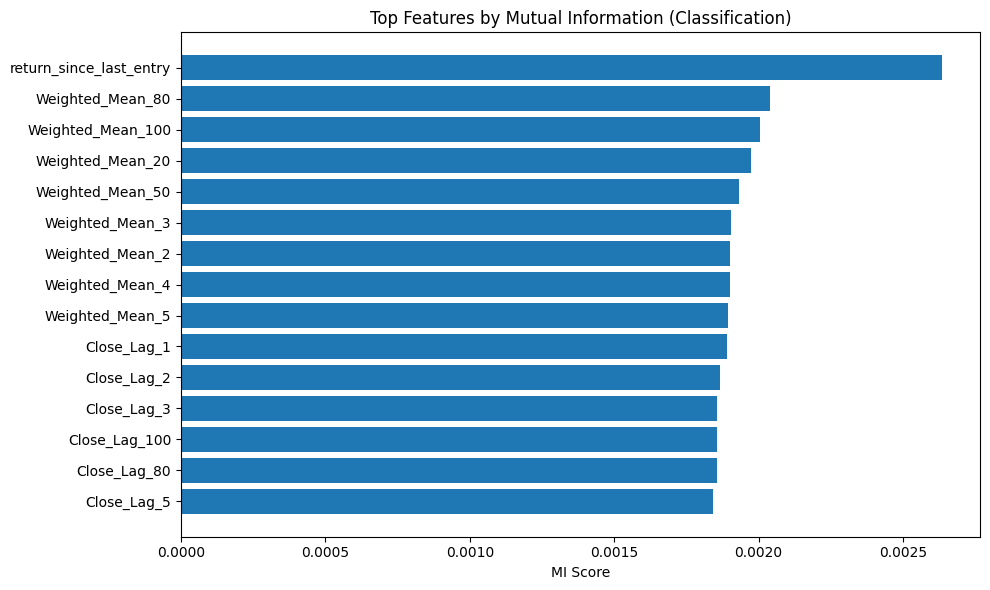

In [15]:
import matplotlib.pyplot as plt

top_n = 15
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'].head(top_n)[::-1], mi_df['MI_Score_Class'].head(top_n)[::-1])
plt.title("Top Features by Mutual Information (Classification)")
plt.xlabel("MI Score")
plt.tight_layout()
plt.show()

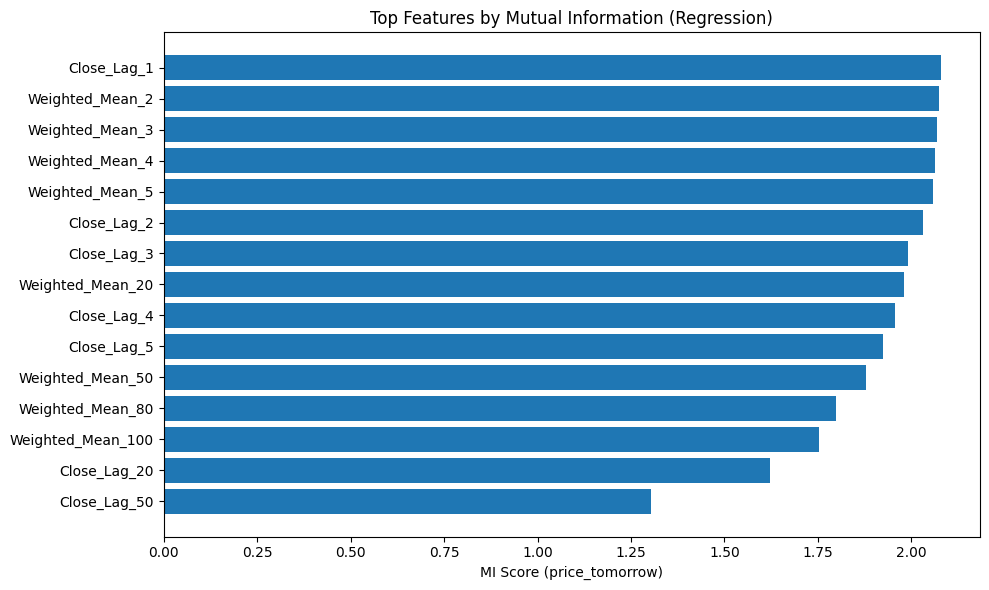

In [16]:
mi_df_sorted_reg = mi_df.sort_values(by='MI_Score_Reg', ascending=False)

# Plot top N features
top_n = 15

plt.figure(figsize=(10, 6))
plt.barh(
    mi_df_sorted_reg['Feature'].head(top_n)[::-1],
    mi_df_sorted_reg['MI_Score_Reg'].head(top_n)[::-1]
)
plt.title("Top Features by Mutual Information (Regression)")
plt.xlabel("MI Score (price_tomorrow)")
plt.tight_layout()
plt.show()

#NN

In [6]:
!pip install -q pytorch-lightning torchinfo tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 48.2 MB/s eta 0:00:00


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_lightning as pl
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint

In [70]:
class StockDataset(Dataset):
    def __init__(self, df, features, target, scaler=None):
        self.X = df[features].values.astype("float32")
        self.y = df[target].values.astype("float32")

        if scaler:
            self.X = scaler.transform(self.X)

        self.X = torch.tensor(self.X)
        self.y = torch.tensor(self.y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
      return self.X[idx], self.y[idx]


In [71]:
class StockDataModule(pl.LightningDataModule):
    def __init__(self, df, features, target, batch_size=64):
        super().__init__()
        self.df = df.dropna(subset=features + [target])
        self.features = features
        self.target = target
        self.batch_size = batch_size
        self.scaler = StandardScaler()

    def setup(self, stage=None):
        n = len(self.df)
        train_end = int(n * 0.7)
        val_end = int(n * 0.85)

        df_train = self.df.iloc[:train_end]
        df_val = self.df.iloc[train_end:val_end]
        df_test = self.df.iloc[val_end:]

        self.scaler.fit(df_train[self.features])

        self.train_dataset = StockDataset(df_train, self.features, self.target, scaler=self.scaler)
        self.val_dataset = StockDataset(df_val, self.features, self.target, scaler=self.scaler)
        self.test_dataset = StockDataset(df_test, self.features, self.target, scaler=self.scaler)

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size, shuffle=False)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size, shuffle=False)

In [72]:
class StockRegressionModel(pl.LightningModule):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
        self.loss_fn = nn.MSELoss()

    def forward(self, x):
        return self.model(x).squeeze(-1)

    def training_step(self, batch, batch_idx):
        x, y = batch
        preds = self(x)
        loss = self.loss_fn(preds, y)
        self.log("train_loss", loss, prog_bar=True, on_epoch=True, on_step=False)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        preds = self(x)
        loss = self.loss_fn(preds, y)
        self.log("val_loss", loss, prog_bar=True, on_epoch=True, on_step=False)
        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        preds = self(x)
        loss = self.loss_fn(preds, y)
        self.log("test_loss", loss, prog_bar=True, on_epoch=True)
        return loss

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=0.001)

In [73]:
df.columns

Index(['Dividends', 'Stock Splits', 'Ticker', 'Industry_Tag', 'Country',
       'Close', 'Year', 'Month', 'Day', 'DayOfWeek', 'Day_Number',
       'Close_Lag_1', 'Volume_Lag_1', 'Days_Since_Lag_1', 'Close_Lag_2',
       'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5', 'Close_Lag_20',
       'Close_Lag_50', 'Close_Lag_80', 'Close_Lag_100', 'Weighted_Mean_2',
       'Weighted_Std_2', 'Weighted_Mean_3', 'Weighted_Std_3',
       'Weighted_Mean_4', 'Weighted_Std_4', 'Weighted_Mean_5',
       'Weighted_Std_5', 'Weighted_Mean_20', 'Weighted_Std_20',
       'Weighted_Mean_50', 'Weighted_Std_50', 'Weighted_Mean_80',
       'Weighted_Std_80', 'Weighted_Mean_100', 'Weighted_Std_100',
       'return_since_last_entry', 'diff_since_last_entry', 'Dividends_signal',
       'Stock Splits_signal'],
      dtype='object')

In [74]:
features = ['Ticker', 'Industry_Tag', 'Country',
       'Year', 'Month', 'Day', 'DayOfWeek',
       'Close_Lag_1', 'Close_Lag_2','Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5',
       'Weighted_Mean_2', 'Weighted_Mean_3', 'Weighted_Mean_4','Weighted_Mean_5',
       'Weighted_Mean_100','Weighted_Std_100',
       'Day_Number','Close']

In [75]:
df_final = df[features]

In [76]:
df_final.dropna(inplace=True)
df_final

<ipython-input-76-16e35f8ead56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.dropna(inplace=True)


,Ticker,Industry_Tag,Country,Year,Month,Day,DayOfWeek,Close_Lag_1,Close_Lag_2,Close_Lag_3,Close_Lag_4,Close_Lag_5,Weighted_Mean_2,Weighted_Mean_3,Weighted_Mean_4,Weighted_Mean_5,Weighted_Mean_100,Weighted_Std_100,Day_Number,Close
100,AAPL,technology,usa,2001,1,9,1,0.225462,0.222620,0.213146,0.213146,0.218831,0.224514,0.222273,0.221083,0.220833,0.456764,0.286659,372,0.260513
101,AAPL,technology,usa,2001,1,19,4,0.260513,0.225462,0.222620,0.213146,0.213146,0.247531,0.242354,0.238067,0.235366,0.477364,0.287411,382,0.295563
102,AAPL,technology,usa,2001,1,29,0,0.295563,0.260513,0.225462,0.222620,0.213146,0.283879,0.272312,0.265559,0.260008,0.486755,0.283777,392,0.328719
103,AAPL,technology,usa,2001,2,36,0,0.328719,0.295563,0.260513,0.225462,0.222620,0.319049,0.309967,0.300697,0.294187,0.480231,0.272838,399,0.305984
104,AAPL,technology,usa,2001,2,39,3,0.305984,0.328719,0.295563,0.260513,0.225462,0.311230,0.309610,0.306442,0.302416,0.438657,0.249534,402,0.314510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98911,ZM,technology,usa,2023,8,240,0,67.699997,65.830002,65.360001,65.375000,67.550003,67.076665,66.812563,66.634887,66.722547,69.996574,8.684420,8637,67.570000
98912,ZM,technology,usa,2023,9,244,4,67.570000,67.699997,65.830002,65.360001,65.375000,67.617271,67.254637,67.028893,66.862712,70.196486,8.794551,8641,71.720001
98913,ZM,technology,usa,2023,9,251,4,71.720001,67.570000,67.699997,65.830002,65.360001,70.106112,69.542978,68.942980,68.545243,71.246183,9.291970,8648,72.059998
98914,ZM,technology,usa,2023,9,258,4,72.059998,71.720001,67.570000,67.699997,65.830002,71.946665,71.045587,70.543749,69.996850,71.726531,9.222725,8655,71.110001


In [77]:
features_nn = [
    'Year', 'Month', 'Day', 'DayOfWeek',
    'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5',
    'Weighted_Mean_2', 'Weighted_Mean_3', 'Weighted_Mean_4', 'Weighted_Mean_5',
    'Weighted_Mean_100', 'Weighted_Std_100',
    'Day_Number'
]
target_nn = 'Close'

In [78]:
from torchinfo import summary


dm = StockDataModule(df_final, features=features_nn, target=target_nn, batch_size=64)

# Model
model = StockRegressionModel(input_dim=len(features_nn))

summary(model)

Layer (type:depth-idx)                   Param #
StockRegressionModel                     --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       1,088
│    └─ReLU: 2-2                         --
│    └─Linear: 2-3                       4,160
│    └─ReLU: 2-4                         --
│    └─Linear: 2-5                       65
├─MSELoss: 1-2                           --
Total params: 5,313
Trainable params: 5,313
Non-trainable params: 0

In [ ]:
# Callbacks
early_stop = EarlyStopping(monitor="val_loss", patience=10, mode="min", verbose=True)
checkpoint_cb = ModelCheckpoint(
    monitor="val_loss",
    mode="min",
    save_top_k=1,
    filename="best-stock-model-{epoch:02d}-{val_loss:.4f}",
    verbose=True
)
from pytorch_lightning.loggers import CSVLogger

csv_logger = CSVLogger("lightning_logs", name="stock_model")

trainer = pl.Trainer(
    max_epochs=100,
    logger=csv_logger,
    accelerator='auto',
    callbacks=[early_stop, checkpoint_cb],
    log_every_n_steps=1
)

# Train and test
trainer.fit(model, datamodule=dm)
best_model = StockRegressionModel.load_from_checkpoint(checkpoint_cb.best_model_path, input_dim=len(features_nn))
trainer.test(best_model, datamodule=dm)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | model   | Sequential | 5.3 K  | train
1 | loss_f

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved. New best score: 128.302
INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 570: 'val_loss' reached 128.30203 (best 128.30203), saving model to 'lightning_logs/stock_model/version_4/checkpoints/best-stock-model-epoch=00-val_loss=128.3020.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 113.242 >= min_delta = 0.0. New best score: 15.060
INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 1140: 'val_loss' reached 15.06045 (best 15.06045), saving model to 'lightning_logs/stock_model/version_4/checkpoints/best-stock-model-epoch=01-val_loss=15.0604.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 7.483 >= min_delta = 0.0. New best score: 7.577
INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 1710: 'val_loss' reached 7.57749 (best 7.57749), saving model to 'lightning_logs/stock_model/version_4/checkpoints/best-stock-model-epoch=02-val_loss=7.5775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 2280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 1.484 >= min_delta = 0.0. New best score: 6.093
INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 2850: 'val_loss' reached 6.09336 (best 6.09336), saving model to 'lightning_logs/stock_model/version_4/checkpoints/best-stock-model-epoch=04-val_loss=6.0934.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.540 >= min_delta = 0.0. New best score: 5.554
INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 3420: 'val_loss' reached 5.55353 (best 5.55353), saving model to 'lightning_logs/stock_model/version_4/checkpoints/best-stock-model-epoch=05-val_loss=5.5535.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 3990: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.178 >= min_delta = 0.0. New best score: 5.375
INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 4560: 'val_loss' reached 5.37511 (best 5.37511), saving model to 'lightning_logs/stock_model/version_4/checkpoints/best-stock-model-epoch=07-val_loss=5.3751.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.189 >= min_delta = 0.0. New best score: 5.186
INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 5130: 'val_loss' reached 5.18574 (best 5.18574), saving model to 'lightning_logs/stock_model/version_4/checkpoints/best-stock-model-epoch=08-val_loss=5.1857.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 5700: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.717 >= min_delta = 0.0. New best score: 4.468
INFO:pytorch_lightning.utilities.rank_zero:Epoch 10, global step 6270: 'val_loss' reached 4.46831 (best 4.46831), saving model to 'lightning_logs/stock_model/version_4/checkpoints/best-stock-model-epoch=10-val_loss=4.4683.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 11, global step 6840: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 12, global step 7410: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 13, global step 7980: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 14, global step 8550: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 15, global step 9120: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 16, global step 9690: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 17, global step 10260: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 18, global step 10830: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 19, global step 11400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_loss did not improve in the last 10 records. Best score: 4.468. Signaling Trainer to stop.
INFO:pytorch_lightning.utilities.rank_zero:Epoch 20, global step 11970: 'val_loss' was not in top 1
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    2.7598068714141846     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 2.7598068714141846}]

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import torch

def evaluate_model(model, datamodule):
    model.eval()
    model.freeze()

    all_preds = []
    all_targets = []

    test_loader = datamodule.test_dataloader()

    for batch in test_loader:
        x, y = batch
        with torch.no_grad():
            preds = model(x)
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(y.cpu().numpy())

    # Metrics
    mse = mean_squared_error(all_targets, all_preds)
    mae = mean_absolute_error(all_targets, all_preds)
    r2 = r2_score(all_targets, all_preds)

    print(f"Test MSE:  {mse:.4f}")
    print(f"Test MAE:  {mae:.4f}")
    print(f"Test R²:   {r2:.4f}")

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(all_targets[:100], label="Actual", marker='o')
    plt.plot(all_preds[:100], label="Predicted", marker='x')
    plt.title("Predicted vs Actual Stock Prices (sample)")
    plt.xlabel("Sample Index")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return {"mse": mse, "mae": mae, "r2": r2}


Test MSE:  2.7598
Test MAE:  0.9855
Test R²:   0.9967


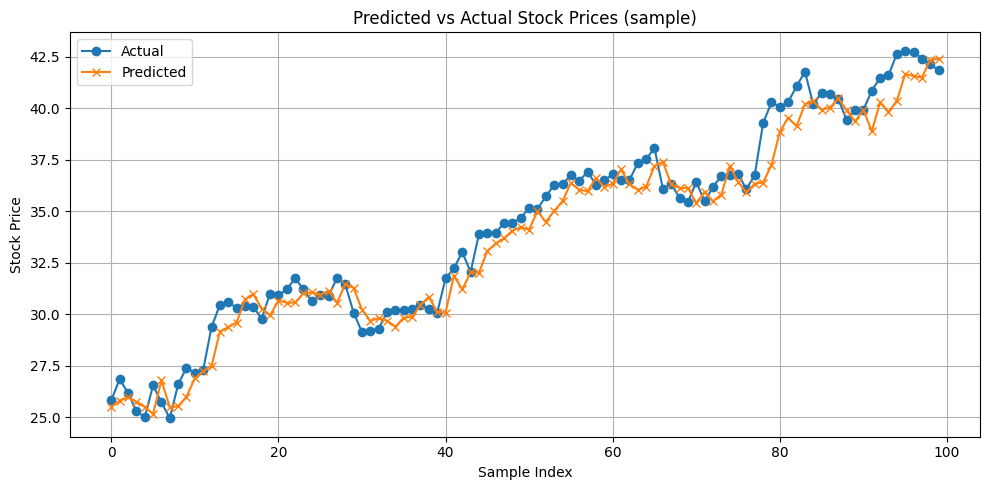

In [ ]:
best_model = StockRegressionModel.load_from_checkpoint(checkpoint_cb.best_model_path, input_dim=len(features_nn))

# Run evaluation
metrics = evaluate_model(best_model, datamodule=dm)

In [32]:
def plot_regression_performance(metrics_path="lightning_logs", model_name="stock_model"):
    import os
    import pandas as pd
    import matplotlib.pyplot as plt

    log_dir = os.path.join(metrics_path, model_name)
    versions = [d for d in os.listdir(log_dir) if d.startswith("version_")]
    latest_version = max(versions, key=lambda x: int(x.split("_")[1]))
    metrics_file = os.path.join(log_dir, latest_version, 'metrics.csv')

    metrics_df = pd.read_csv(metrics_file)

    # Check if 'epoch' column exists, otherwise use 'step'
    if 'epoch' not in metrics_df.columns:
        if 'step' in metrics_df.columns:
            # Assume 'step' represents epochs if 'epoch' is missing
            metrics_df.rename(columns={'step': 'epoch'}, inplace=True)
        else:
            raise KeyError("Neither 'epoch' nor 'step' column found in metrics.csv")

    # Assuming 'epoch' is now present (either originally or renamed from 'step')
    metrics_df = metrics_df.groupby(['epoch'], sort=False).last().reset_index(drop=False) #changed to drop=False to keep epoch index
    metrics_df['epoch'] += 1  # for 1-indexed display

    # Rename for convenience
    metrics_df.rename(columns={
        'train_loss_epoch': 'train_loss',
        'val_loss': 'val_loss'
    }, inplace=True)

    fig, ax = plt.subplots(figsize=(8, 5))
    if 'train_loss' in metrics_df.columns:
        ax.plot(metrics_df['epoch'], metrics_df['train_loss'], label='Training Loss')
    if 'val_loss' in metrics_df.columns:
        ax.plot(metrics_df['epoch'], metrics_df['val_loss'], label='Validation Loss')

    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.set_title("Training and Validation Loss")
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

    return metrics_df


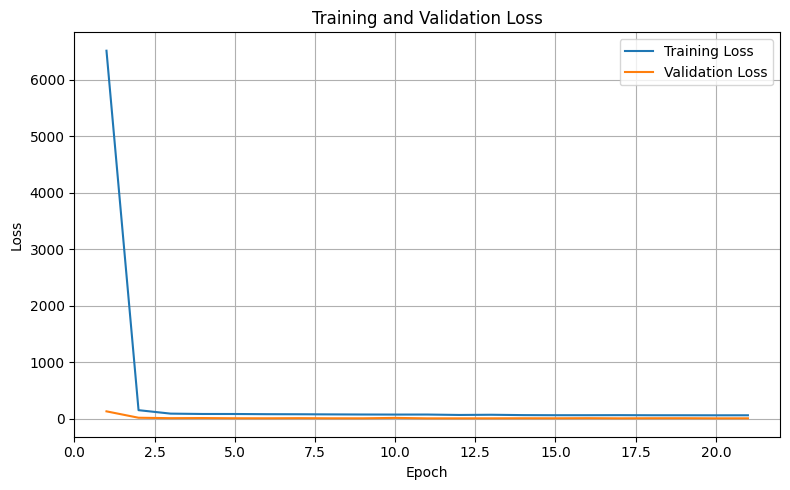

In [ ]:
metrics_df = plot_regression_performance("lightning_logs")


In [82]:
df_final["Target_Close_7d"] = df_final.groupby("Ticker")["Close"].shift(-7)

<ipython-input-82-06e9a8e8fb73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Target_Close_7d"] = df_final.groupby("Ticker")["Close"].shift(-7)


In [83]:
df_final

,Ticker,Industry_Tag,Country,Year,Month,Day,DayOfWeek,Close_Lag_1,Close_Lag_2,Close_Lag_3,...,Close_Lag_5,Weighted_Mean_2,Weighted_Mean_3,Weighted_Mean_4,Weighted_Mean_5,Weighted_Mean_100,Weighted_Std_100,Day_Number,Close,Target_Close_7d
100,AAPL,technology,usa,2001,1,9,1,0.225462,0.222620,0.213146,...,0.218831,0.224514,0.222273,0.221083,0.220833,0.456764,0.286659,372,0.260513,0.277564
101,AAPL,technology,usa,2001,1,19,4,0.260513,0.225462,0.222620,...,0.213146,0.247531,0.242354,0.238067,0.235366,0.477364,0.287411,382,0.295563,0.295563
102,AAPL,technology,usa,2001,1,29,0,0.295563,0.260513,0.225462,...,0.213146,0.283879,0.272312,0.265559,0.260008,0.486755,0.283777,392,0.328719,0.293668
103,AAPL,technology,usa,2001,2,36,0,0.328719,0.295563,0.260513,...,0.222620,0.319049,0.309967,0.300697,0.294187,0.480231,0.272838,399,0.305984,0.276617
104,AAPL,technology,usa,2001,2,39,3,0.305984,0.328719,0.295563,...,0.225462,0.311230,0.309610,0.306442,0.302416,0.438657,0.249534,402,0.314510,0.282300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98911,ZM,technology,usa,2023,8,240,0,67.699997,65.830002,65.360001,...,67.550003,67.076665,66.812563,66.634887,66.722547,69.996574,8.684420,8637,67.570000,NaN
98912,ZM,technology,usa,2023,9,244,4,67.570000,67.699997,65.830002,...,65.375000,67.617271,67.254637,67.028893,66.862712,70.196486,8.794551,8641,71.720001,NaN
98913,ZM,technology,usa,2023,9,251,4,71.720001,67.570000,67.699997,...,65.360001,70.106112,69.542978,68.942980,68.545243,71.246183,9.291970,8648,72.059998,NaN
98914,ZM,technology,usa,2023,9,258,4,72.059998,71.720001,67.570000,...,65.830002,71.946665,71.045587,70.543749,69.996850,71.726531,9.222725,8655,71.110001,NaN


In [84]:
df_final = df_final.dropna(subset=features + ["Target_Close_7d"])

In [36]:
df_final

,Ticker,Industry_Tag,Country,Year,Month,Day,DayOfWeek,Close_Lag_1,Close_Lag_2,Close_Lag_3,...,Close_Lag_5,Weighted_Mean_2,Weighted_Mean_3,Weighted_Mean_4,Weighted_Mean_5,Weighted_Mean_100,Weighted_Std_100,Day_Number,Close,Target_Close_7d
100,AAPL,technology,usa,2001,1,9,1,0.225462,0.222620,0.213146,...,0.218831,0.224514,0.222273,0.221083,0.220833,0.456764,0.286659,372,0.260513,0.277564
101,AAPL,technology,usa,2001,1,19,4,0.260513,0.225462,0.222620,...,0.213146,0.247531,0.242354,0.238067,0.235366,0.477364,0.287411,382,0.295563,0.295563
102,AAPL,technology,usa,2001,1,29,0,0.295563,0.260513,0.225462,...,0.213146,0.283879,0.272312,0.265559,0.260008,0.486755,0.283777,392,0.328719,0.293668
103,AAPL,technology,usa,2001,2,36,0,0.328719,0.295563,0.260513,...,0.222620,0.319049,0.309967,0.300697,0.294187,0.480231,0.272838,399,0.305984,0.276617
104,AAPL,technology,usa,2001,2,39,3,0.305984,0.328719,0.295563,...,0.225462,0.311230,0.309610,0.306442,0.302416,0.438657,0.249534,402,0.314510,0.282300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,AAPL,technology,usa,2020,7,203,1,96.437332,94.446960,95.162704,...,91.353577,96.039258,95.949355,95.832825,95.627098,88.087693,13.447785,7504,95.106346,109.139748
1799,AAPL,technology,usa,2020,7,204,2,95.106346,96.437332,94.446960,...,94.047424,95.550008,95.420238,95.402599,95.343421,89.033546,12.428216,7505,95.373520,112.867386
1800,AAPL,technology,usa,2020,7,209,0,95.373520,95.106346,96.437332,...,95.162704,95.252077,95.584392,95.397782,95.371439,84.156421,14.885836,7510,92.959076,112.572708
1801,AAPL,technology,usa,2020,7,211,2,92.959076,95.373520,95.106346,...,94.446960,93.495619,93.757830,94.096548,94.126893,85.710596,13.655426,7512,93.184601,124.276146


In [72]:
dm = StockDataModule(df_final, features=features_nn, target="Target_Close_7d", batch_size=64)

In [73]:
model = StockRegressionModel(input_dim=len(features_nn))

In [39]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint
from pytorch_lightning.loggers import CSVLogger


In [74]:
logger = CSVLogger("lightning_logs", name="stock_model_7day")

early_stop = EarlyStopping(monitor="val_loss", patience=10, mode="min", verbose=True)
checkpoint_cb = ModelCheckpoint(
    monitor="val_loss",
    save_top_k=1,
    mode="min",
    filename="best-7d-model-{epoch:02d}-{val_loss:.4f}",
    verbose=True
)

trainer_7d = pl.Trainer(
    max_epochs=100,
    logger=logger,
    callbacks=[early_stop, checkpoint_cb],
    log_every_n_steps=1,
    accelerator='auto'
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [75]:
trainer_7d.fit(model, datamodule=dm)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | model   | Sequential | 5.3 K  | train
1 | loss_fn | MSELoss    | 0      | train
-----------------------------------------------
5.3 K     Trainable params
0         Non-trainable params
5.3 K     Total params
0.021     Total estimated model params size (MB)
7         Modules in train mod

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved. New best score: 185.467
INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 1010: 'val_loss' reached 185.46739 (best 185.46739), saving model to 'lightning_logs/stock_model_7day/version_1/checkpoints/best-7d-model-epoch=00-val_loss=185.4674.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 4.913 >= min_delta = 0.0. New best score: 180.555
INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 2020: 'val_loss' reached 180.55463 (best 180.55463), saving model to 'lightning_logs/stock_model_7day/version_1/checkpoints/best-7d-model-epoch=01-val_loss=180.5546.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 18.063 >= min_delta = 0.0. New best score: 162.491
INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 3030: 'val_loss' reached 162.49121 (best 162.49121), saving model to 'lightning_logs/stock_model_7day/version_1/checkpoints/best-7d-model-epoch=02-val_loss=162.4912.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 4040: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 5050: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.995 >= min_delta = 0.0. New best score: 161.496
INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 6060: 'val_loss' reached 161.49577 (best 161.49577), saving model to 'lightning_logs/stock_model_7day/version_1/checkpoints/best-7d-model-epoch=05-val_loss=161.4958.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 7070: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 8080: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.965 >= min_delta = 0.0. New best score: 160.531
INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 9090: 'val_loss' reached 160.53108 (best 160.53108), saving model to 'lightning_logs/stock_model_7day/version_1/checkpoints/best-7d-model-epoch=08-val_loss=160.5311.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 10100: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 4.760 >= min_delta = 0.0. New best score: 155.771
INFO:pytorch_lightning.utilities.rank_zero:Epoch 10, global step 11110: 'val_loss' reached 155.77069 (best 155.77069), saving model to 'lightning_logs/stock_model_7day/version_1/checkpoints/best-7d-model-epoch=10-val_loss=155.7707.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 11, global step 12120: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 12, global step 13130: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 13, global step 14140: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 14, global step 15150: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 1.199 >= min_delta = 0.0. New best score: 154.572
INFO:pytorch_lightning.utilities.rank_zero:Epoch 15, global step 16160: 'val_loss' reached 154.57204 (best 154.57204), saving model to 'lightning_logs/stock_model_7day/version_1/checkpoints/best-7d-model-epoch=15-val_loss=154.5720.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 16, global step 17170: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 17, global step 18180: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 5.072 >= min_delta = 0.0. New best score: 149.500
INFO:pytorch_lightning.utilities.rank_zero:Epoch 18, global step 19190: 'val_loss' reached 149.50040 (best 149.50040), saving model to 'lightning_logs/stock_model_7day/version_1/checkpoints/best-7d-model-epoch=18-val_loss=149.5004.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.041 >= min_delta = 0.0. New best score: 149.459
INFO:pytorch_lightning.utilities.rank_zero:Epoch 19, global step 20200: 'val_loss' reached 149.45930 (best 149.45930), saving model to 'lightning_logs/stock_model_7day/version_1/checkpoints/best-7d-model-epoch=19-val_loss=149.4593.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 20, global step 21210: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 21, global step 22220: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 22, global step 23230: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 23, global step 24240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 24, global step 25250: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 25, global step 26260: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 26, global step 27270: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 27, global step 28280: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.776 >= min_delta = 0.0. New best score: 148.683
INFO:pytorch_lightning.utilities.rank_zero:Epoch 28, global step 29290: 'val_loss' reached 148.68294 (best 148.68294), saving model to 'lightning_logs/stock_model_7day/version_1/checkpoints/best-7d-model-epoch=28-val_loss=148.6829.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 29, global step 30300: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.998 >= min_delta = 0.0. New best score: 147.685
INFO:pytorch_lightning.utilities.rank_zero:Epoch 30, global step 31310: 'val_loss' reached 147.68457 (best 147.68457), saving model to 'lightning_logs/stock_model_7day/version_1/checkpoints/best-7d-model-epoch=30-val_loss=147.6846.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 31, global step 32320: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 32, global step 33330: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 33, global step 34340: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 34, global step 35350: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 35, global step 36360: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 1.267 >= min_delta = 0.0. New best score: 146.417
INFO:pytorch_lightning.utilities.rank_zero:Epoch 36, global step 37370: 'val_loss' reached 146.41748 (best 146.41748), saving model to 'lightning_logs/stock_model_7day/version_1/checkpoints/best-7d-model-epoch=36-val_loss=146.4175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 37, global step 38380: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 38, global step 39390: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 39, global step 40400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 40, global step 41410: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.155 >= min_delta = 0.0. New best score: 146.263
INFO:pytorch_lightning.utilities.rank_zero:Epoch 41, global step 42420: 'val_loss' reached 146.26253 (best 146.26253), saving model to 'lightning_logs/stock_model_7day/version_1/checkpoints/best-7d-model-epoch=41-val_loss=146.2625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 42, global step 43430: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 43, global step 44440: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 44, global step 45450: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 45, global step 46460: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 46, global step 47470: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 47, global step 48480: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 48, global step 49490: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.527 >= min_delta = 0.0. New best score: 145.735
INFO:pytorch_lightning.utilities.rank_zero:Epoch 49, global step 50500: 'val_loss' reached 145.73524 (best 145.73524), saving model to 'lightning_logs/stock_model_7day/version_1/checkpoints/best-7d-model-epoch=49-val_loss=145.7352.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 50, global step 51510: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 51, global step 52520: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 52, global step 53530: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 53, global step 54540: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 54, global step 55550: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 55, global step 56560: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 56, global step 57570: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 57, global step 58580: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 58, global step 59590: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_loss did not improve in the last 10 records. Best score: 145.735. Signaling Trainer to stop.
INFO:pytorch_lightning.utilities.rank_zero:Epoch 59, global step 60600: 'val_loss' was not in top 1


Test MSE:  165.5315
Test MAE:  5.4947
Test R²:   0.9640


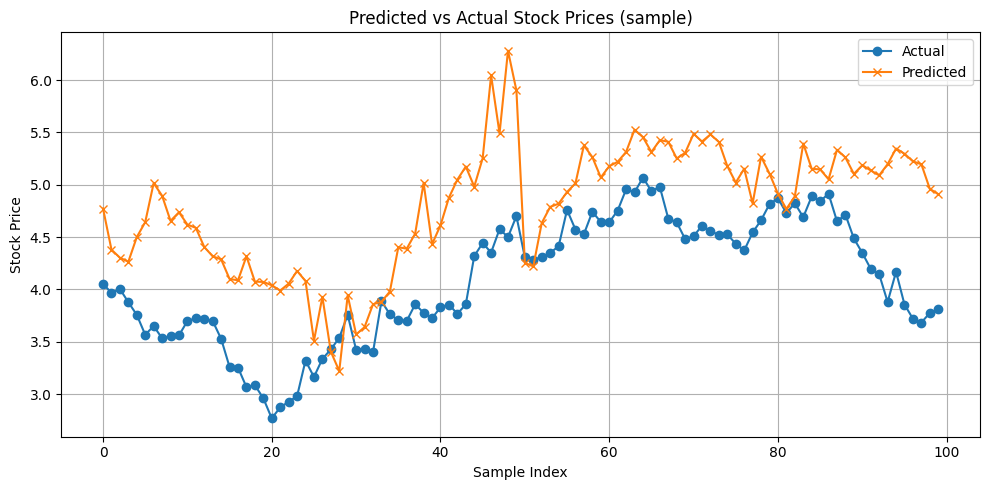

In [76]:
best_model = StockRegressionModel.load_from_checkpoint(checkpoint_cb.best_model_path, input_dim=len(features_nn ))
metrics = evaluate_model(best_model, dm)

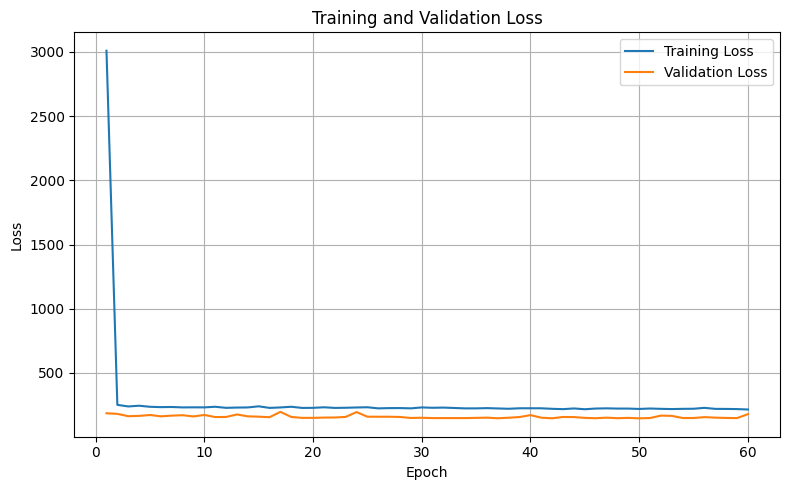

In [77]:
metrics_df = plot_regression_performance("lightning_logs", model_name="stock_model_7day")


In [78]:
df_final["Target_LogReturn_7d"] = np.log(df_final["Close"].shift(-7)) - np.log(df_final["Close"])
df_final = df_final.dropna(subset=features_nn + ["Target_LogReturn_7d"]).copy()


In [79]:
dm = StockDataModule(df_final, features=features_nn, target="Target_LogReturn_7d", batch_size=64)

In [80]:
logger = CSVLogger("lightning_logs", name="log_return_7d")

early_stop = EarlyStopping(monitor="val_loss", patience=10, mode="min", verbose=True)
checkpoint_cb = ModelCheckpoint(
    monitor="val_loss",
    save_top_k=1,
    mode="min",
    filename="best-log_return-model-{epoch:02d}-{val_loss:.4f}",
    verbose=True
)

trainer_log_7 = pl.Trainer(
    max_epochs=100,
    logger=logger,
    callbacks=[early_stop, checkpoint_cb],
    log_every_n_steps=1,
    accelerator='auto'
)
model_log_7 = StockRegressionModel(input_dim=len(features_nn))

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [81]:
trainer_log_7.fit(model_log_7, datamodule=dm)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | model   | Sequential | 5.3 K  | train
1 | loss_fn | MSELoss    | 0      | train
-----------------------------------------------
5.3 K     Trainable params
0         Non-trainable params
5.3 K     Total params
0.021     Total estimated model params size (MB)
7         Modules in train mod

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved. New best score: 0.049
INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 1010: 'val_loss' reached 0.04908 (best 0.04908), saving model to 'lightning_logs/log_return_7d/version_7/checkpoints/best-log_return-model-epoch=00-val_loss=0.0491.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 2020: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.048
INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 3030: 'val_loss' reached 0.04781 (best 0.04781), saving model to 'lightning_logs/log_return_7d/version_7/checkpoints/best-log_return-model-epoch=02-val_loss=0.0478.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.045
INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 4040: 'val_loss' reached 0.04536 (best 0.04536), saving model to 'lightning_logs/log_return_7d/version_7/checkpoints/best-log_return-model-epoch=03-val_loss=0.0454.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.045
INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 5050: 'val_loss' reached 0.04468 (best 0.04468), saving model to 'lightning_logs/log_return_7d/version_7/checkpoints/best-log_return-model-epoch=04-val_loss=0.0447.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 6060: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 7070: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 8080: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 9090: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.041
INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 10100: 'val_loss' reached 0.04134 (best 0.04134), saving model to 'lightning_logs/log_return_7d/version_7/checkpoints/best-log_return-model-epoch=09-val_loss=0.0413.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 10, global step 11110: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.037
INFO:pytorch_lightning.utilities.rank_zero:Epoch 11, global step 12120: 'val_loss' reached 0.03714 (best 0.03714), saving model to 'lightning_logs/log_return_7d/version_7/checkpoints/best-log_return-model-epoch=11-val_loss=0.0371.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 12, global step 13130: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 13, global step 14140: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.034
INFO:pytorch_lightning.utilities.rank_zero:Epoch 14, global step 15150: 'val_loss' reached 0.03402 (best 0.03402), saving model to 'lightning_logs/log_return_7d/version_7/checkpoints/best-log_return-model-epoch=14-val_loss=0.0340.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 15, global step 16160: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 16, global step 17170: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 17, global step 18180: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 18, global step 19190: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 19, global step 20200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 20, global step 21210: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 21, global step 22220: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 22, global step 23230: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 23, global step 24240: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_loss did not improve in the last 10 records. Best score: 0.034. Signaling Trainer to stop.
INFO:pytorch_lightning.utilities.rank_zero:Epoch 24, global step 25250: 'val_loss' was not in top 1


Test MSE:  0.0396
Test MAE:  0.0887
Test R²:   0.0571


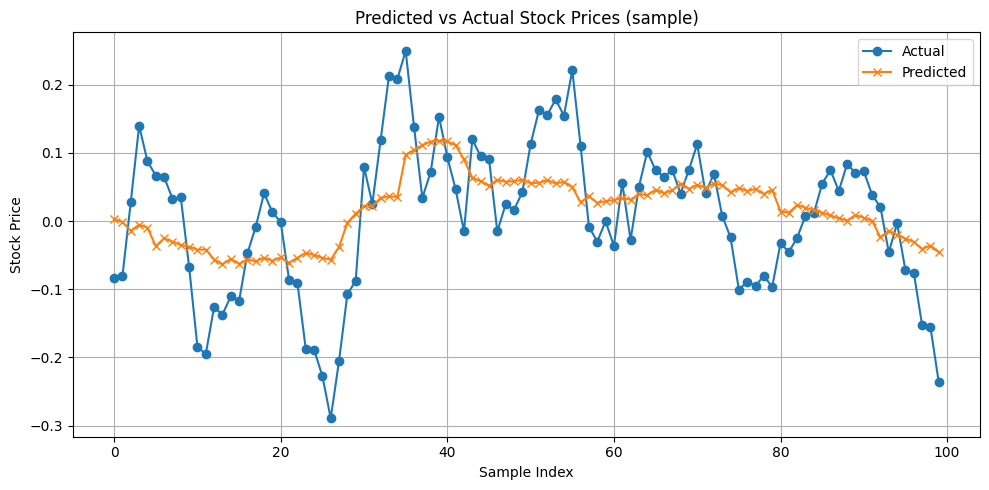

In [82]:
best_model = StockRegressionModel.load_from_checkpoint(checkpoint_cb.best_model_path, input_dim=len(features_nn))
metrics = evaluate_model(best_model, dm)

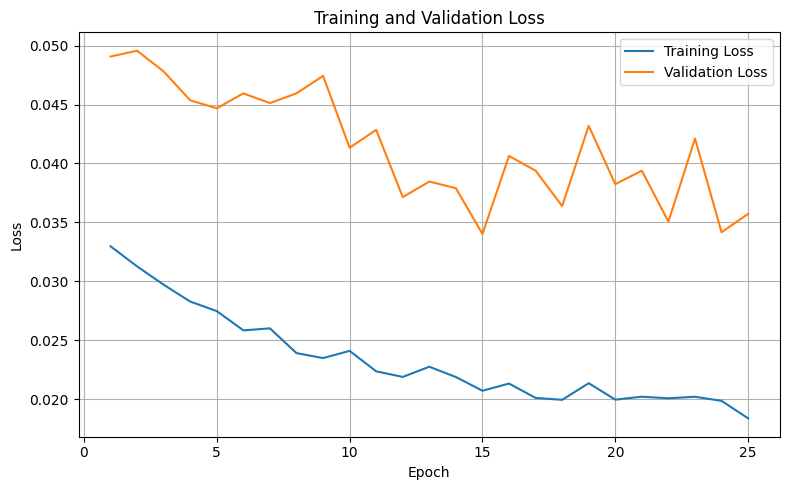

In [83]:
metrics_df = plot_regression_performance("lightning_logs", model_name="log_return_7d")